# Analysis of Diet and COVID-19

## Introduction
---------
Since the start of the COVID-19 pandemic early this year, people have taken various measurements, such as social distancing, self-isolation, avoid large gathering, and mandetory curfew in some countries, to prevent the spread of the disease. However, is this the only way that we can stay safe before a vaccine is avaliable to the general pubic? 

In this tutorial, we are trying to explore how our **diet** would help us combat the coronavirus. 

## Libaraies Used
--------------
For this tutorial, we will be using several python libraries and we will assume that you are familiar with these libaraies. Below is a module checklist for what you need to get started. 
- **numpy**
- **pandas**
- **scikit-learn**
- **matplotlib**
- **statsmodels**

In [244]:
# all the modules we need for this tutorial
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Data Collection
--------
The data that we found is from [kaggle.com(click to check & download)](https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset?select=Supply_Food_Data_Descriptions.csv), which contains already collected diet data along with COVID-19 data. In this tutorial, we will be using **"Food_Supply_Quantity_kg_Data.csv"** and **"Supply_Food_Data_Descriptions.csv"** as our data source. (All the COVID-19 related data from this source are updated at 12/3/2020.)

Now it comes to our first step, we want to store our collected data from the CSV source we just obtain to the pandas dataframe. Below is one of the ways we can approach it, using the function `pd.read_csv()` from pandas module.

In [245]:
# Import data:
origin_df = pd.read_csv("Food_Supply_Quantity_kg_Data.csv - Sheet1.csv")
origin_df

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.120684,0.004680,0.095114,0.019903,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,1.399542,0.029563,0.701621,0.668358,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.191816,0.005555,0.123971,0.062290,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.047103,0.001079,0.025026,0.020998,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.146939,0.004082,0.135714,0.007143,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.359808,0.003159,0.342224,0.014425,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.001412,0.000036,0.001248,0.000127,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.007433,0.002082,0.005090,0.000262,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.096279,0.001942,0.092940,0.001398,18384000.0,%


The following is the description of each food category:

In [246]:
description = pd.read_csv("Supply_Food_Data_Descriptions.csv - Sheet1.csv")
pd.options.display.max_colwidth = 400
description

,Categories,Items
0,Alcoholic Beverages,"Alcohol, Non-Food; Beer; Beverages, Alcoholic; Beverages, Fermented; Wine"
1,Animal fats,"Butter, Ghee; Cream; Fats, Animals, Raw; Fish, Body Oil; Fish, Liver Oil"
2,Animal Products,"Aquatic Animals, Others; Aquatic Plants; Bovine Meat; Butter, Ghee; Cephalopods; Cream; Crustaceans; Demersal Fish; Eggs; Fats, Animals, Raw; Fish, Body Oil; Fish, Liver Oil; Freshwater Fish; Marine Fish, Other; Meat, Aquatic Mammals; Meat, Other; Milk - Excluding Butter; Molluscs, Other; Mutton & Goat Meat; Offals, Edible; Pelagic Fish; Pigmeat; Poultry Meat"
3,"Aquatic Products, Other","Aquatic Animals, Others; Aquatic Plants; Meat, Aquatic Mammals"
4,Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and products; Millet and products; Oats; Rice (Milled Equivalent); Rye and products; Sorghum and products; Wheat and products"
5,Eggs,Eggs
6,"Fish, Seafood","Cephalopods; Crustaceans; Demersal Fish; Freshwater Fish; Marine Fish, Other; Molluscs, Other; Pelagic Fish"
7,Fruits - Excluding Wine,"Apples and products; Bananas; Citrus, Other; Dates; Fruits, Other; Grapefruit and products; Grapes and products (excl wine); Lemons, Limes and products; Oranges, Mandarines; Pineapples and products; Plantains"
8,Meat,"Bovine Meat; Meat, Other; Mutton & Goat Meat; Pigmeat; Poultry Meat"
9,Milk - Excluding Butter,Milk - Excluding Butter


## Data Processing
-----------
As you can see, the above data seems to be a bit messy, given there are so many categories and the categorization of each type of food seems to be too precise and some of them are redundent. In this step, we will combine and drop some food categories to make the data more brief and understandable.

According to [USDA's Choose MyPlate program](https://www.choosemyplate.gov/eathealthy/WhatIsMyPlate) ,a daily diet can be categorized into fruits, vegetabels, grains, diary, protein foods, and oils. However, given that countries have different food cultures around the world, we will also add stimulants (such as coffee, and tea), spcies, and alcoholic beverages to our food categories. Our food category will be a combination of the provided food categories:

* Fruits: Fruits-excluding wine
* Vegatables: Pulses, staychy roots, sugar & sweeteners, sugar crops, vehetables, vegetal products
* Grains: Cereals-exclusing beers
* Protein Foods: Animal products, aquatic products, other, eggs, seafood, fish, meat, offals.
* Diary: Milk-excluding butter.
* Oils: Animal fat, oilcrops, treenuts, vegetable oils. 
* Stimulants: coffee, tea, etc.
* Spices: Cloves; Pepper; Pimento; Spices, Other
* Alcholoic Drink: Alcohol, Non-Food; Beer; Beverages, Alcoholic; Beverages, Fermented; Wine

We will drop "Miscellaneous" from the original data since the decription of this category is very vague. 

Moreover, the proportion of each food category in a diet does not reflect the absolute quantity of each food cateory, which means a diet might appear to be healthy from a proportion prespective, but the actual quantity of the diet might be very large or small. This would effect a nation's nutrition status, such as obesity rate  rate. Therefore, we will also include each country's **obesity** rate in our dataset. 

We have also considered including undernourishment rate as part of our nutrition status matrics, but given the undernourishment rate data provided by this data set is not accurate and complete enought, for example, many countries' undernourishment rates are either recorded as Na or just <2.5, we decided not to include undernourishment rate as part of our nutrition status matrics. 

We will also drop all rows with Na. 

<!-- For **Undernourished** column, we will replace all values of <2.5 with 2.5, since we do not have accurate data on the undernourishment data on these countries based on this dataset.  -->

Please note: **all the data we will be using are in %**

<!-- * Fruits: Berries, 100% fruit juice, melons, other fruits(such as apples, bananas, grapes, figs, etc.)
* Vegatables: Dark green vegetables(broccoli, etc.), red and orange vegetables(carrots, tomatos, sweet potatos, etc.), starchy vegetables(corn, white potatos, yams, etc.), beans and peas(black beans, chickpeas, etc.), other vegetables(beets, asparagus, onions, etc.) 
* Grains: whole grains(cereals, oatmeal, brown rice, etc.), refined grains(white bread, pasta, white rice, etc.)
* Protein Foods: Meats(beef, pork, etc.), poultry(chicken etc.), soy products, eggs, nuts and seeds, seafood
* Diary: milk(including soy milk), cheese, yogurt
* Oils: vegetable oil, animal fat, nuts,etc. 
* Stimulants: Coffee, tea, etc.
* Spices: red pepper, curry spices, etc.
* Alcholoic Drink: beer, wine, etc.  -->

In [247]:
# Create a new df with combinations of variables from the origin_df
data = {'Country': origin_df['Country'], 
        'Fruits': origin_df['Fruits - Excluding Wine'], 
       'Vegetables': origin_df['Pulses'] + origin_df['Starchy Roots'] + origin_df['Sugar & Sweeteners'] + origin_df['Sugar Crops'] + origin_df['Vegetables'] + origin_df['Vegetal Products'], 
       'Grains': origin_df['Cereals - Excluding Beer'], 
       'Protein': origin_df['Animal Products'] + origin_df['Animal Products'] + origin_df['Eggs'] + origin_df['Fish, Seafood'] + origin_df['Meat'] + origin_df['Offals'], 
       'Diary': origin_df['Milk - Excluding Butter'], 
       'Oils': origin_df['Animal fats'] + origin_df['Oilcrops'] + origin_df['Treenuts'] + origin_df['Vegetable Oils'], 
       'Stimulants': origin_df['Stimulants'], 
       'Spices': origin_df['Spices'], 
       'Alcohol': origin_df['Alcoholic Beverages'], 
        'Obesity': origin_df['Obesity'],
        'Undernourished': origin_df['Undernourished'], 
       'COVID_19_Rate': origin_df['Confirmed']}

df = pd.DataFrame(data)
df=df.dropna() # drop all rows with Na. 

df

,Country,Fruits,Vegetables,Grains,Protein,Diary,Oils,Stimulants,Spices,Alcohol,Obesity,Undernourished,COVID_19_Rate
0,Afghanistan,5.3495,49.8531,24.8097,20.5208,7.5828,0.8788,0.3078,0.0574,0.0014,4.5,29.8,0.120684
1,Albania,6.7861,46.5900,5.7817,40.4478,15.7213,1.5510,0.1055,0.0008,1.6719,22.3,6.2,1.399542
2,Algeria,6.3801,58.4600,13.6816,21.2536,7.6189,1.5237,0.2216,0.0557,0.2711,26.6,3.9,0.191816
3,Angola,6.0005,67.9867,9.1085,13.8971,0.8311,1.1270,0.0508,0.0009,5.8087,6.8,25,0.047103
5,Argentina,6.0435,41.1546,8.4102,47.5780,10.2328,1.2091,0.4378,0.0122,4.2672,28.5,4.6,3.173641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),7.6460,45.6981,12.9253,34.8381,9.3920,1.4427,0.1479,0.0009,2.5952,25.2,21.2,0.359808
166,Vietnam,5.9029,56.7364,16.8740,24.9530,0.6069,1.5321,0.2880,0.2074,1.4591,2.1,9.3,0.001412
167,Yemen,5.1344,54.4168,27.2077,15.4265,1.8911,1.2167,0.2199,0.0347,0.0364,14.1,38.9,0.007433
168,Zambia,1.0183,57.1475,21.1938,16.2192,1.7570,2.6236,0.0618,0.0478,5.7360,6.5,46.7,0.096279


## Data Visulization
-------------
In this section, we will plot the data to observe potential trends in our data and see what is useful to analyze.

We will start by visualize the proportion of each food category of each country's diet using a horizontal stacked bar plot. This process is done using matplotlib.plot.barh() function. 

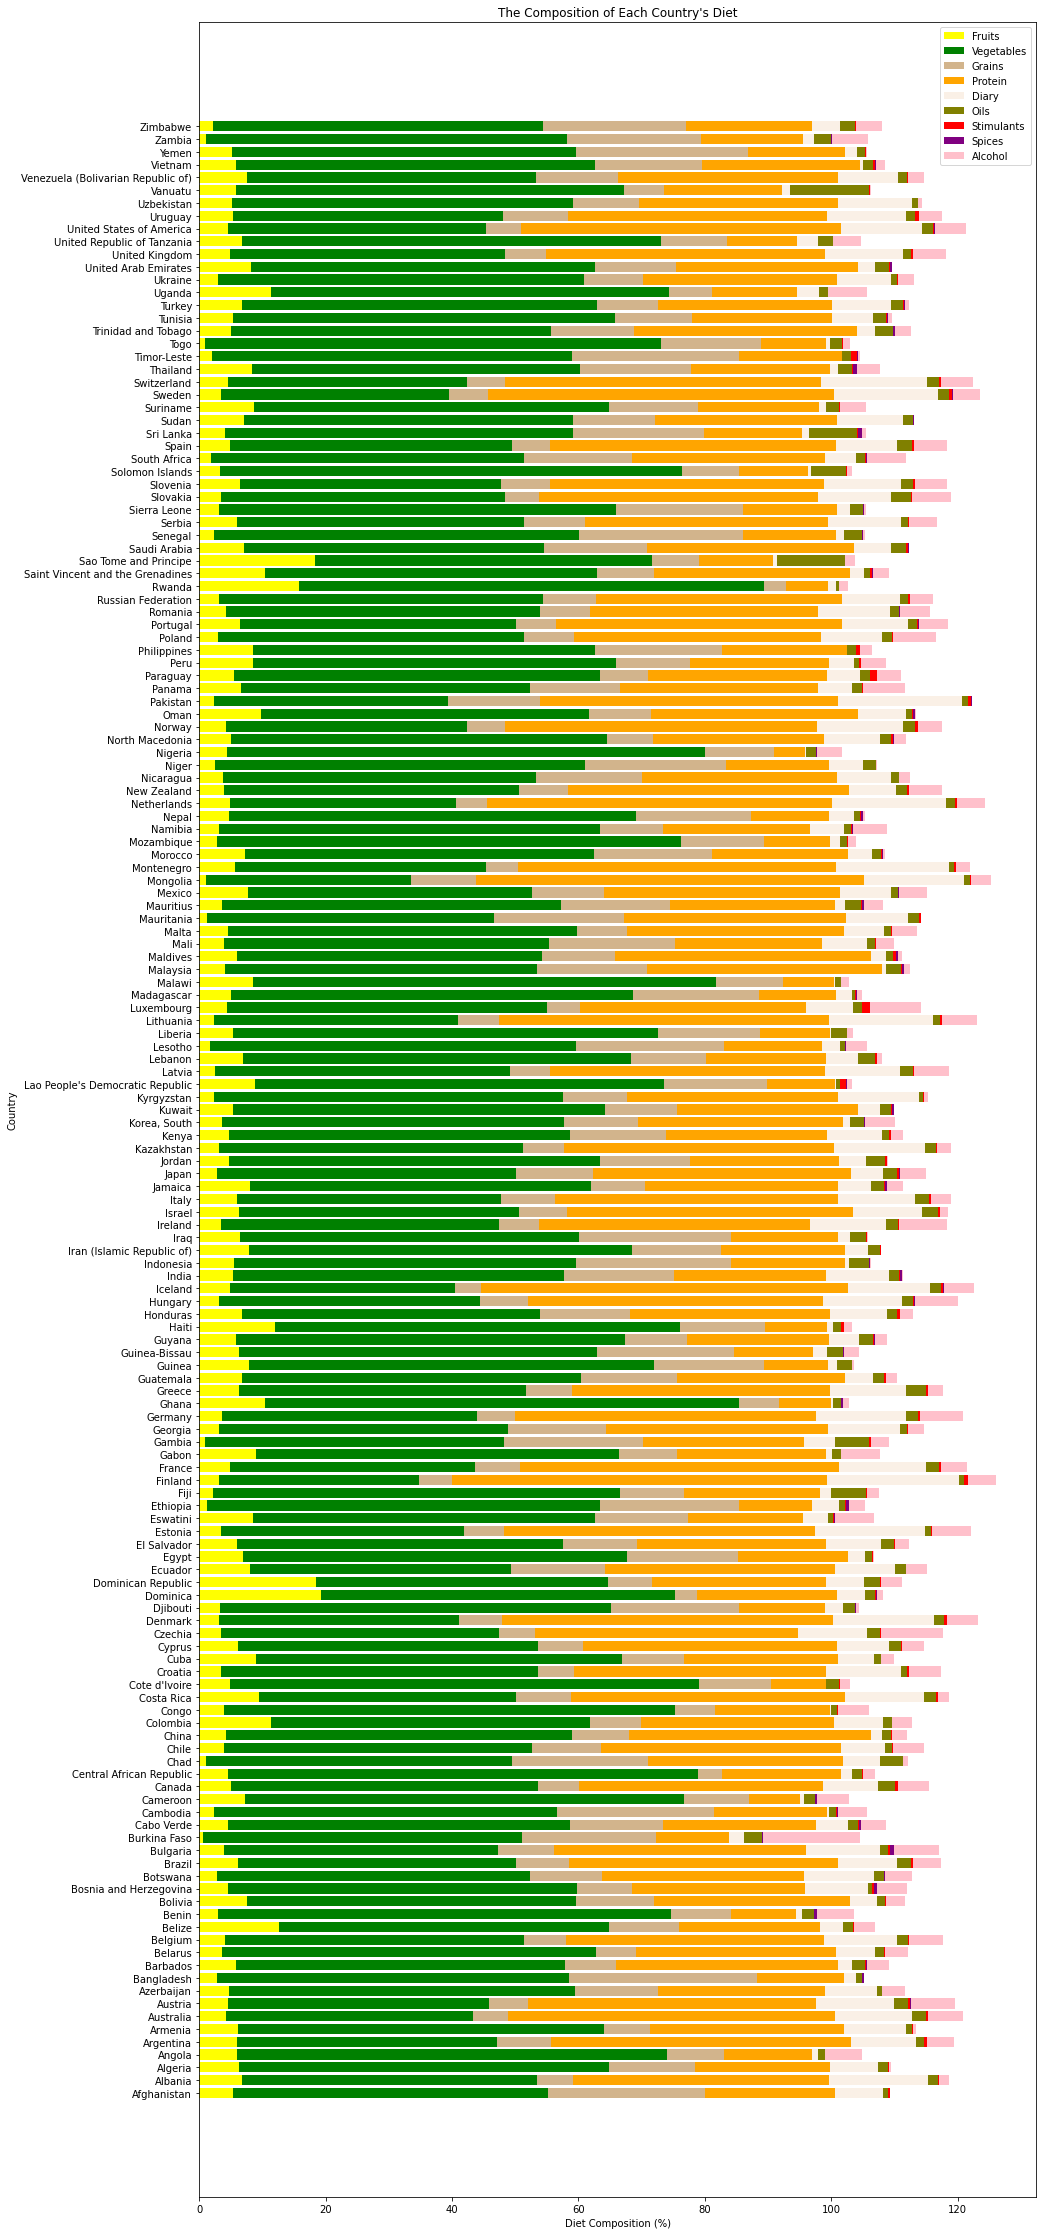

In [248]:
plt.figure(figsize=(15, 40)) # Set appropriate window size

# Adding each food proportion to the horizontal stack
plt.barh(df['Country'], df['Fruits'], color='yellow', label = 'Fruits')
plt.barh(df['Country'], df['Vegetables'], left=df['Fruits'], color='green', label = 'Vegetables')
plt.barh(df['Country'], df['Grains'], left=df['Fruits'] + df['Vegetables'], color='tan', label = 'Grains')
plt.barh(df['Country'], df['Protein'], left=df['Fruits'] + df['Vegetables'] + df['Grains'], color='orange', label = 'Protein')
plt.barh(df['Country'], df['Diary'], left=df['Fruits'] + df['Vegetables'] + df['Grains'] + df['Protein'], color='linen', label = 'Diary')
plt.barh(df['Country'], df['Oils'], left=df['Fruits'] + df['Vegetables'] + df['Grains'] + df['Protein'] + df['Diary'], color='olive', label = 'Oils')
plt.barh(df['Country'], df['Stimulants'], left=df['Fruits'] + df['Vegetables'] + df['Grains'] + df['Protein'] + df['Diary'] + df['Oils'], color='red', label = 'Stimulants')
plt.barh(df['Country'], df['Spices'], left=df['Fruits'] + df['Vegetables'] + df['Grains'] + df['Protein'] + df['Diary'] + df['Oils'] + df['Stimulants'], color='purple', label = 'Spices')
plt.barh(df['Country'], df['Alcohol'], left=df['Fruits'] + df['Vegetables'] + df['Grains'] + df['Protein'] + df['Diary'] + df['Oils'] + df['Stimulants'] + df['Spices'], color='pink', label = 'Alcohol')

plt.title("The Composition of Each Country's Diet")
plt.xlabel("Diet Composition (%)")
plt.ylabel("Country")

res = plt.legend()

As you can notice on the horizonal axis, that the total percentage all call food categories of most countries exceeds 100%. This is mostly because some food might appear in mutiple categories, which results in counting the same food multiple times when we sum the proportion of all food categories. For example, treenuts can be counted as sources of both oil and protein in a diet.

The above bar plot shows that **vegetables**, **grains**, and **protein** are the major food categories making up diets across all countries. 

Let's start by plotting COVID-19 rate over vegetables, grains, and protein.

- We can start by constructing a figure by using `plt.figure()` in the matplotlib module, you can adjust the size of the figure by adding the parameter **figsize**. For instance, if we want to set the figure size to be 12 by 8, then we can apply the following `plt.figure(figsize=(12,8))`, please note that this step is totally optional if you are good with the default figure size. 

- Then it comes to our plotting procedure, we want to draw scatter plot in this case for analysis, to do that we can use the **scatter** function `plt.scatter()` from matplotlib module. 

- After plotting the figure, we want to add the x-label, y-label along with the title for the graph. It is important that you apply title, x-label and y-label to illustrate the subjects of your plot to the people who are seeing it.

With the above being said, we can start by plotting COVID-19 Rate vs. Vegetables/Grains/Protein:

### Vegetables:

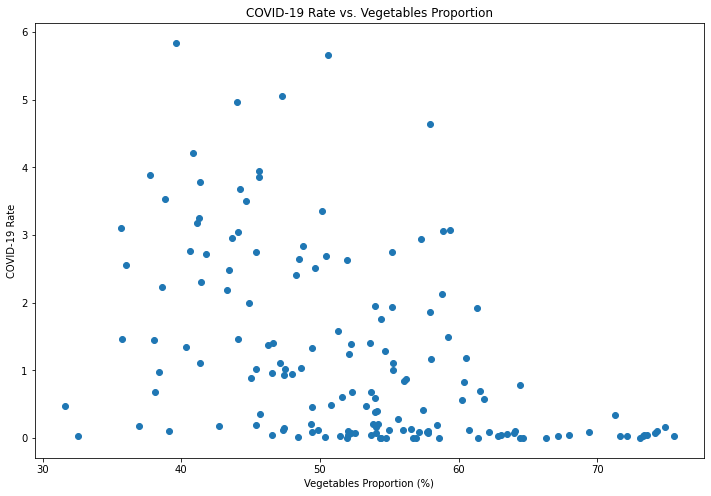

In [251]:
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Vegetables'],df['COVID_19_Rate']) # scatter plot
plt.title("COVID-19 Rate vs. Vegetables Proportion")
plt.xlabel('Vegetables Proportion (%)')

res = plt.ylabel('COVID-19 Rate')

It seems that there is possibily a negative correlation between COVID-19 Rate and Vegetables Proportion in a diet. As the proportion of vegetables increases, the COVID-19 rate decreases. It appears that when vegetablee propotion exceeds approximately 60%, the COVID-19 rate drops drastically. We will explore the exact relationship between COVID-19 rate and vegetables protion in the analysis section of this tutorial. 

### Grains:

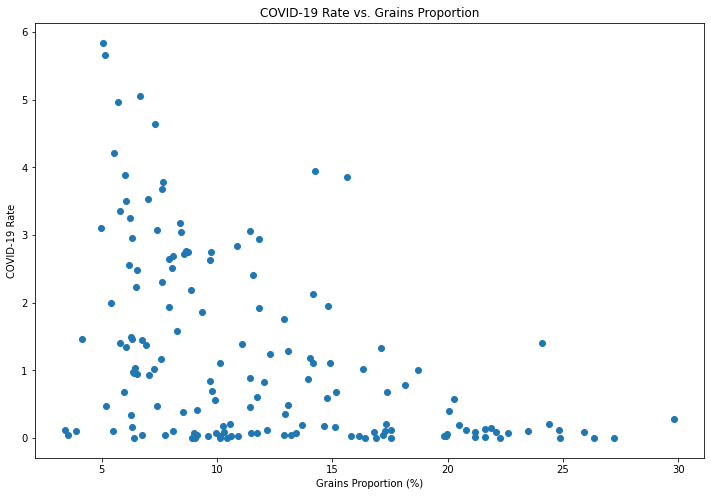

In [252]:
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Grains'],df['COVID_19_Rate']) # scatter plot
plt.title("COVID-19 Rate vs. Grains Proportion")
plt.xlabel('Grains Proportion (%)')
res = plt.ylabel('COVID-19 Rate')

Similar to vegetables, there is possibily a stronger negative correlation between COVID-19 rate and grans proportion in a diet. As the proportion of grains increases, the COVID-19 rate decreases. However, the relationship does not appear to be exactly linear, we will explore more about this relationship in the analysis section of this tutorial. 

### Protein:

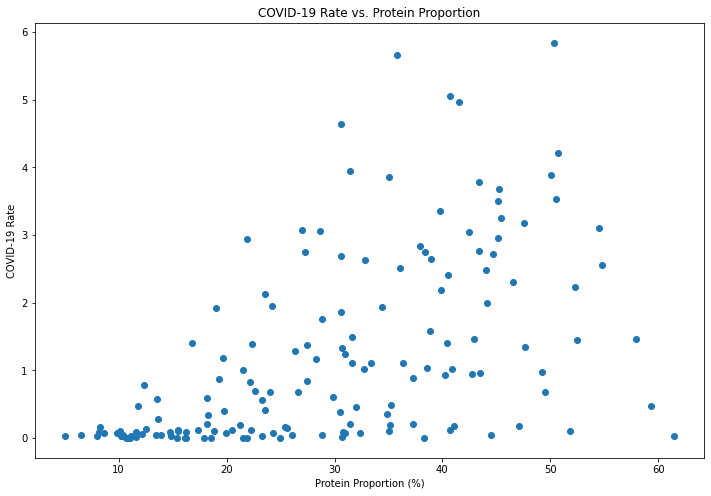

In [253]:
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Protein'],df['COVID_19_Rate']) # scatter plot
plt.title("COVID-19 Rate vs. Protein Proportion")
plt.xlabel('Protein Proportion (%)')
res = plt.ylabel('COVID-19 Rate')

It seems that there is a positive correlation between protein proportion and COVID-19 rate. As the proportion of protein increases, COVID-19 rate increases as well. However, this does not follow our normal assumption where protein is an essential source of nutrition. We will explore more on this in the analysis section.

Even though diets accross these countries are mostly made up by vegetables, grains, and protein, we cannot neglect the possible relationship between other food categories and COVID-19 rate.

Now, we will plot COVID-19 Rate vs. Fruits/Diary/Oils/Stumulants/Spices/Alcohol:

### Fruits:

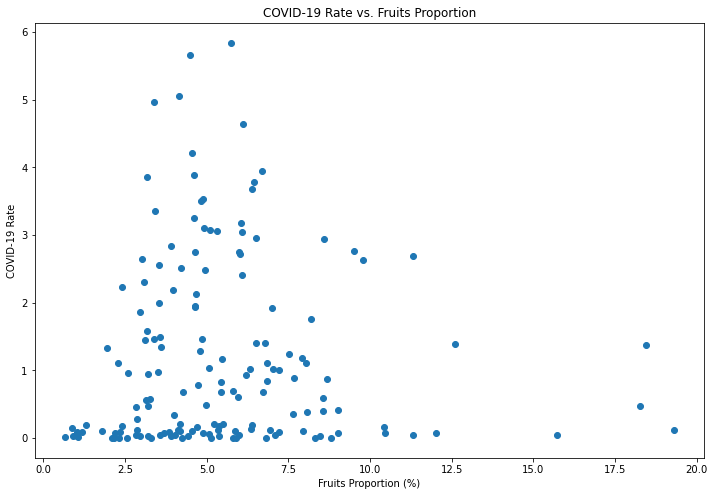

In [254]:
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Fruits'],df['COVID_19_Rate']) # drawing scatter plot
plt.title("COVID-19 Rate vs. Fruits Proportion") # adding title to the plot
plt.xlabel('Fruits Proportion (%)') # adding x-label to the plot
res = plt.ylabel('COVID-19 Rate') # adding y-label to the plot

### Diary:

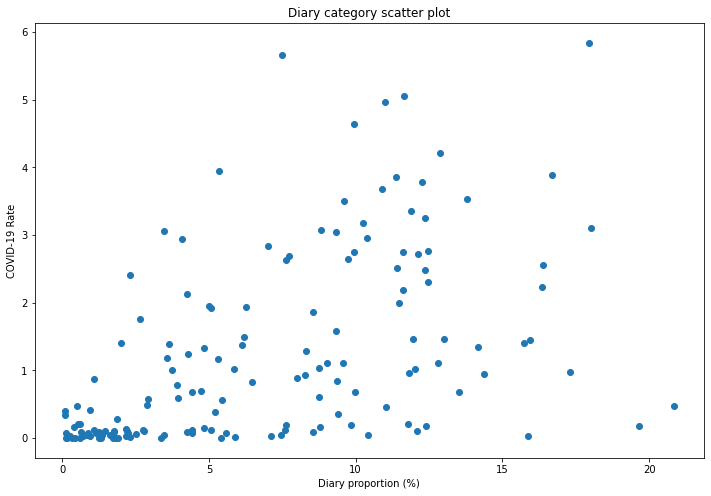

In [167]:
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Diary'],df['COVID_19_Rate']) # scatter plot
plt.title("Diary category scatter plot")
plt.xlabel('Diary proportion (%)')
res = plt.ylabel('COVID-19 Rate')

### Oils:

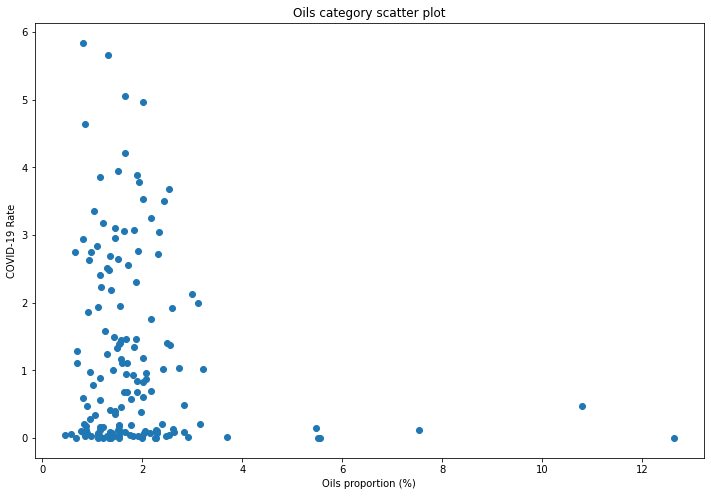

In [168]:
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Oils'],df['COVID_19_Rate']) # scatter plot
plt.title("Oils category scatter plot")
plt.xlabel('Oils proportion (%)')
res = plt.ylabel('COVID-19 Rate')

### Stimulants:

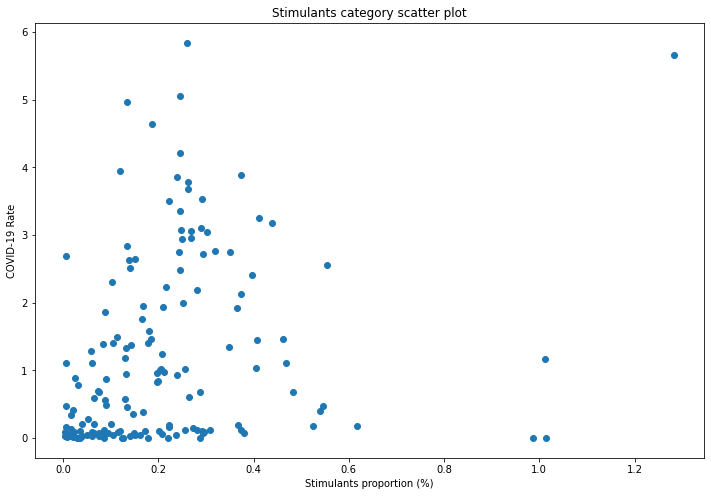

In [169]:
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Stimulants'],df['COVID_19_Rate']) # scatter plot
plt.title('Stimulants category scatter plot')
plt.xlabel('Stimulants proportion (%)')
res = plt.ylabel('COVID-19 Rate')

### Spices:

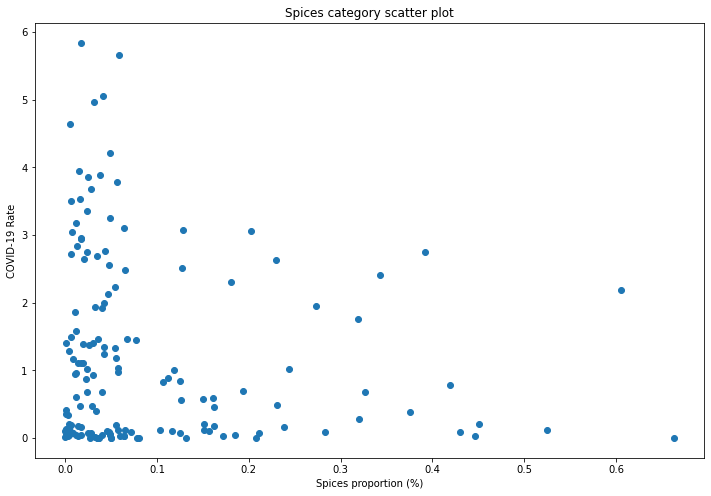

In [170]:
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Spices'],df['COVID_19_Rate']) # scatter plot
plt.title('Spices category scatter plot')
plt.xlabel('Spices proportion (%)')
res = plt.ylabel('COVID-19 Rate')

### Alcohol:

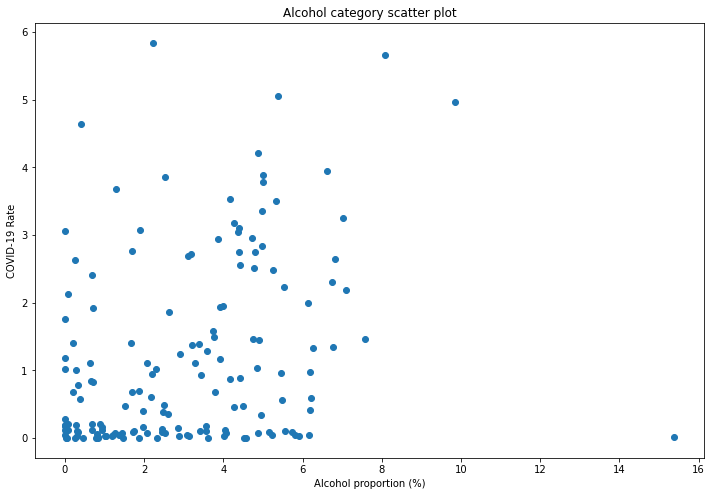

In [171]:
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Alcohol'],df['COVID_19_Rate']) # scatter plot
plt.title('Alcohol category scatter plot')
plt.xlabel('Alcohol proportion (%)')
res = plt.ylabel('COVID-19 Rate')

From the above plots, it seems that there no observable correlations between Fruits/Diary/Oils/Stimilants/Spices/Alcohol and COVID-19 rate. They all share the property where most of the data are concentrated on a certain horizontal interval and spreading in random patterns, with the exception of COVID-19 vs. Diary Proportion, where most of the data are spreading out on the entire domain at random. 

As we stated earlier, the food category proportion of each country's diet only shows the relative proportion of each food category in a diet. It does not show the abosolute quantity of each food category in a diet. For example, an under-developed country's diet could be majorly vegetables and protein based, but the amount vegetables and protein are very small compared with other countries. Therefore, we also need to see if the nutrition status of each country has relationship with COVID-19 rate. In our dataset, we have **obesity** rate as our matrics of nutrition status. 

We will plot COVID-19 Rate vs. Obesity Rate

### Obesity Rate

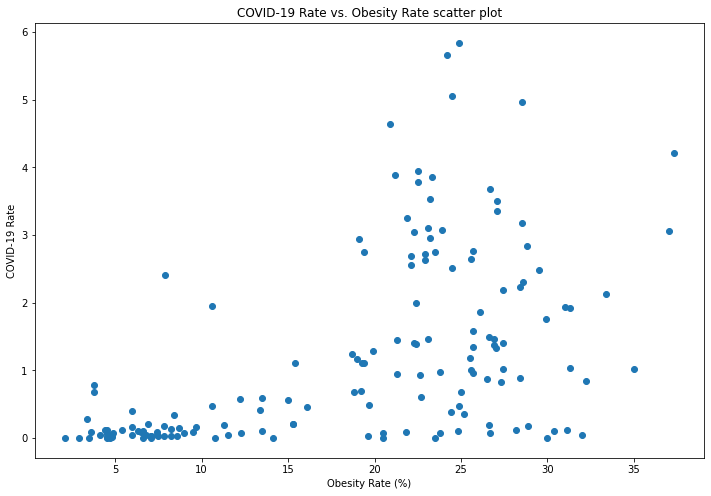

In [256]:
# Obesity vs. COVID-19 Rate
plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Obesity'],df['COVID_19_Rate']) # scatter plot
plt.title('COVID-19 Rate vs. Obesity Rate scatter plot')
plt.xlabel('Obesity Rate (%)')
res = plt.ylabel('COVID-19 Rate')

It appears that there is a potential positive correlation between obesity rate and COVID-19 rate. However, the increase of COVID-19 rate is not gradual. When obesity rate exceeds 15%, COVID-19 rate increases drastically, which indicates this relationship might not be linear. 

## Data Analysis
-------------
In this section, we will apply machine learning and statistical analysis to explore relationships between data. We will use linear regression model to obtain a predictive model of COVID-19 Rate based on diet composition. 

After plotting the data, we would like to see if there is really a strong correlation between COVID-19 rate and vegetables/grains/protein proportions as we hypothesized. We will fit a regression line and get their R-Squared value, and use Ordinary Least Square(OLS) regression analysis on these three relationships seperately.

Please note: we will use significance level of 0.05 for all hypothesis tests below. We will conclude there is a strong linear relationship between indepedent variables and depedent variable if the model's R-Squared value is greater than or equal to 0.5

### Vegetables

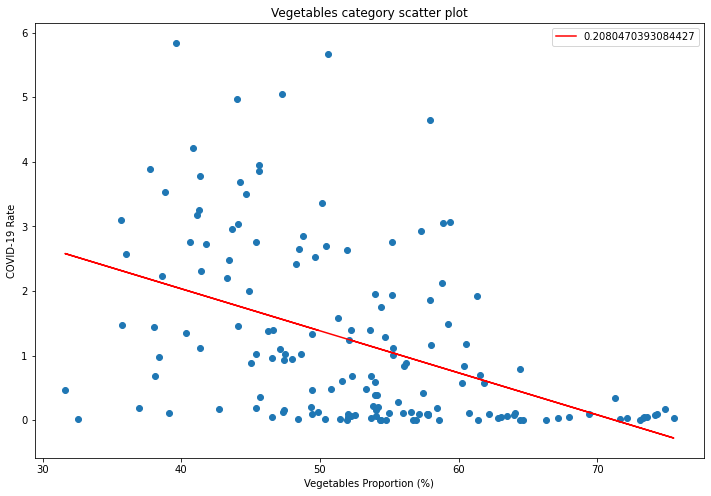

In [257]:
# Get linear regression model
vegetables = np.array(df['Vegetables']).reshape(-1, 1)
reg = LinearRegression().fit(vegetables, df['COVID_19_Rate'])
predicted = reg.predict(vegetables)
r_squared = reg.score(vegetables, df['COVID_19_Rate']) # reg.score return the R^2 value of the current regression model

plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Vegetables'],df['COVID_19_Rate']) # scatter plot
plt.title("Vegetables category scatter plot")
plt.xlabel('Vegetables Proportion (%)')
res = plt.ylabel('COVID-19 Rate')

# Plot regression line
res = plt.plot(df['Vegetables'], predicted, '-',color='red', label = r_squared)
res = plt.legend()

In [258]:
# OLS Analysis
mod = smf.ols(formula="COVID_19_Rate ~ Vegetables", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          COVID_19_Rate   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     40.19
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           2.46e-09
Time:                        20:05:11   Log-Likelihood:                -250.84
No. Observations:                 155   AIC:                             505.7
Df Residuals:                     153   BIC:                             511.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6347      0.550      8.424      0.0

### Grains

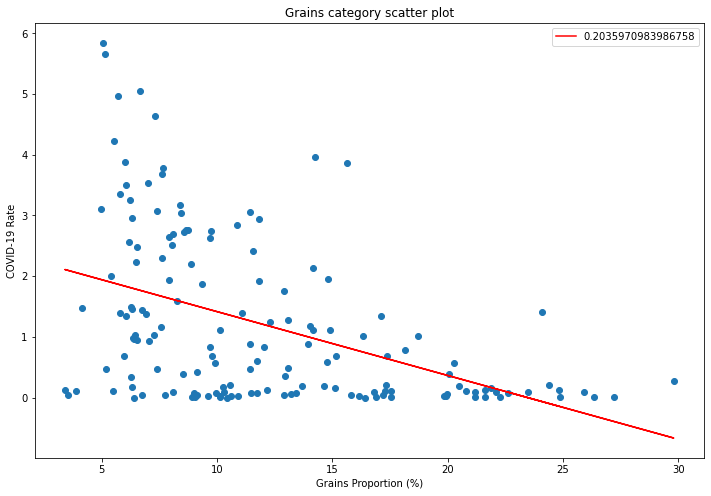

In [260]:
# Get linear regression model
grains = np.array(df['Grains']).reshape(-1, 1)
reg = LinearRegression().fit(grains, df['COVID_19_Rate'])
predicted = reg.predict(grains)
r_squared = reg.score(grains, df['COVID_19_Rate']) # reg.score return the R^2 value of the current regression model

plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Grains'],df['COVID_19_Rate']) # scatter plot
plt.title("Grains category scatter plot")
plt.xlabel('Grains Proportion (%)')
res = plt.ylabel('COVID-19 Rate')

# Plot regression line
res = plt.plot(df['Grains'], predicted, '-',color='red', label = r_squared)
res = plt.legend()

In [261]:
# OLS Analysis
mod = smf.ols(formula="COVID_19_Rate ~ Grains", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          COVID_19_Rate   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     39.11
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           3.81e-09
Time:                        20:05:32   Log-Likelihood:                -251.27
No. Observations:                 155   AIC:                             506.5
Df Residuals:                     153   BIC:                             512.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4657      0.225     10.967      0.0

### Protein

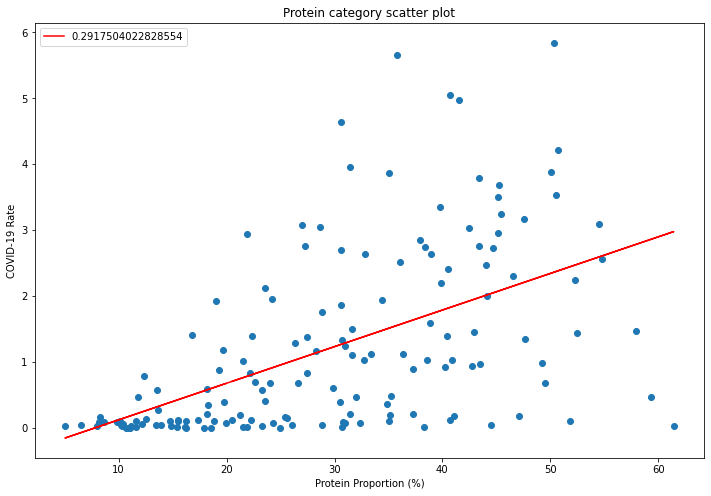

In [262]:
# Get linear regression model
protein = np.array(df['Protein']).reshape(-1, 1)
reg = LinearRegression().fit(protein, df['COVID_19_Rate'])
predicted = reg.predict(protein)
r_squared = reg.score(protein, df['COVID_19_Rate']) # reg.score return the R^2 value of the current regression model

plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Protein'],df['COVID_19_Rate']) # scatter plot
plt.title("Protein category scatter plot")
plt.xlabel('Protein Proportion (%)')
res = plt.ylabel('COVID-19 Rate')

# Plot regression line
res = plt.plot(df['Protein'], predicted, '-',color='red', label = r_squared)
res = plt.legend()

In [263]:
# OLS Analysis
mod = smf.ols(formula="COVID_19_Rate ~ Protein", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          COVID_19_Rate   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     63.03
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           4.07e-13
Time:                        20:05:49   Log-Likelihood:                -242.18
No. Observations:                 155   AIC:                             488.4
Df Residuals:                     153   BIC:                             494.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4348      0.226     -1.920      0.0

From the above plots and their OLS analysis, it confirmed our hypothesis ealier, where vegetable and grains proportion have negative linear relationship with COVID-19 rate, and protein proportion has a positive linear relationship with COVID-19 rate. This claim can be supported by the fact that the p-values of all indepedent varible's coefficients are less than 0.05, which rejects the null hypothesis where all indepedent variables' coefficients are 0.

R-Squared value of COVID-19 Rate over Vegetables Proportion model is 0.208, R-Squared value of COVID-19 Rate over Grains Proportion model is 0.204, and the R-Squared value of COVID-19 Rate over Protein Proportion model is 0.292. These R-Squared values suggest that there is no strong linear relationships between vegetables/grains/protein proportions and COVID-19 rate.
<!-- However, based on the above R-Squared values: 0.208, 0.204, and 0.292, it appears that there is no strong linear relationships between vegetables/grains/protein proportions and COVID-19 results.  -->

Now, let's see if there is a strong linear relationship between obesity rate and COVID-19 rate

### Obesity

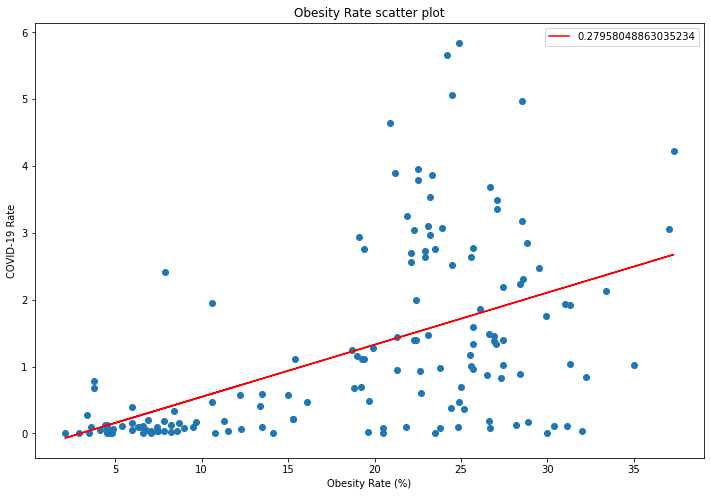

In [264]:
obesity = np.array(df['Obesity']).reshape(-1, 1)
reg = LinearRegression().fit(obesity, df['COVID_19_Rate'])
predicted = reg.predict(obesity)
r_squared = reg.score(obesity, df['COVID_19_Rate']) # reg.score return the R^2 value of the current regression model

plt.figure(figsize=(12,8)) # make the figure slightly bigger for better visulization
plt.scatter(df['Obesity'],df['COVID_19_Rate']) # scatter plot
plt.title("Obesity Rate scatter plot")
plt.xlabel('Obesity Rate (%)')
res = plt.ylabel('COVID-19 Rate')

# Plot regression line
res = plt.plot(df['Obesity'], predicted, '-',color='red', label = r_squared)
res = plt.legend()

In [266]:
# OLS Analysis
mod = smf.ols(formula="COVID_19_Rate ~ Obesity", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          COVID_19_Rate   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     59.38
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           1.53e-12
Time:                        20:07:00   Log-Likelihood:                -243.50
No. Observations:                 155   AIC:                             491.0
Df Residuals:                     153   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2337      0.209     -1.119      0.2

Based on the plot and OSL analysis above, it appears that there is a positive linear relaionship between obesity rate and COVID-19 rate since the p-value of the indepedent variable's coefficient is < 0.05. However, given that the R-Squared value of the above is approximately 0.280, which is small, we conclude that there is no strong linear relationship between obesity rate and COVID-19 rate. 

Now, let's see if there exists a strong linear model between COVID-19 rate, vagatables proportion, grains proportion, and protein proportion. 

In [267]:
mod = smf.ols(formula="COVID_19_Rate ~ Vegetables + Grains + Protein", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          COVID_19_Rate   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     25.32
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           2.52e-13
Time:                        20:07:31   Log-Likelihood:                -237.33
No. Observations:                 155   AIC:                             482.7
Df Residuals:                     151   BIC:                             494.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6182      2.363      1.531      0.1

From the above OLS regression results, we see that although is R-Squared value is still less than 0.5, this model shows a stronger linear relationship between the predictors and depedent varible than models with just one food category. However, the p-value for Protein's coefficient and Vegetables' coefficient are both greater than our significance level of 0.05, and the p-value of Protein's coefficient is much larger than Vegetables'.

Let's what happens if we remove Protein from our predictors:

In [268]:
mod = smf.ols(formula="COVID_19_Rate ~ Vegetables + Grains", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          COVID_19_Rate   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     37.96
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           4.26e-14
Time:                        20:08:45   Log-Likelihood:                -237.52
No. Observations:                 155   AIC:                             481.0
Df Residuals:                     152   BIC:                             490.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0070      0.511      9.792      0.0

It seems that by removing Protein from our model, the p-value of all predictor's coefficients are small enough to reject the null hypothesis where there is no linear relationships between the predictors and the depedent variable. 

Let's what happens if we add obesity rate into our model:

In [269]:
mod = smf.ols(formula="COVID_19_Rate ~ Vegetables + Grains + Obesity", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          COVID_19_Rate   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     30.67
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           1.53e-15
Time:                        20:09:07   Log-Likelihood:                -232.03
No. Observations:                 155   AIC:                             472.1
Df Residuals:                     151   BIC:                             484.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1785      0.740      4.298      0.0

We can see that by adding obesity rate to our model, the R-squared value slightly increases, but still not big enough to claim that there is a strong linear relationship between the predictors and the depedent variable. 

From the above analysis on the correlation between vegetables/grains/protein/obesity rate and COVID-19 rate, we can see there is no **strong** linear correlation between the predictors and COVID-19 rate. However, we did discover is that there are negative correlations between vegetables/grains/obesity rate and COVID-19 rate, meaning that as these factors increases, the COVID-19 rate decreases. Protein is the only food category that has positive correlation with COVID-19 rate: as protein portion increases, COVID-19 rate increases as well. Moreover, although our model between COVID-19 rate and vegetable, grains portions, and obesity is not strongly linear, we can see that these factors do play a role in affecting COVID-rates, given that their coefficients' p-values are much less than the significance level of 0.05. 

## Insights
--------------

When we first obtained the data, we want to show that there is some kind of relationship between people's diet and the likelihood of getting COVID-19. After plotting out the dataset, we hypothesized that there might be a linear relationship between the food categories that make up the majority of the diet accross the world, such as vegetables, grains, and protein, and COVID-19 rate. However, when we did a linear regression analysis on these data, we conclude that these food categories do not have a strong linear correlation with COVID-19 rate. Among the few food categories we analyzed, we found that there is a potential negative correlation between the proportions of vegetables and grains in a diet, and the likelihood of getting COVID-19; there is a a potential positive correlation between the protein proportion, and the likelihood of getting COVID-19. 

Further analysis is need on this topic, because there are countless factors, such as each country's public health policy, nation's economic power, population, diet, food culture, etc., effect the likelihood of being infected with a respetory disease like COVID-19. Our analysis showing there is no linear relationship between diet and the likelihood of being infected by COVID-19 does not mean there is no relationship at all. We are aware that our data might be flawed given that the categorization is not extremely precise. A more rigorous food categorization method is needed to explore the relationship between diet and COVID-19. Also, more advanced regression models and machine learning methods can be applied to the data such as polynomial regression, GMM, etc. 

If you need any information regarding COVID-19, please visit [CDC's website](https://www.cdc.gov/coronavirus/2019-ncov/index.html)